# Gradient Boosted Trees

In [1]:
# we learened
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

#now learn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

- Gradient Boosted Trees
    - Sequential correction of previous estimator errors.
    - Does not tweak the weights of training instances.
    - Fit each predictor is trained using its predecessor's residual errors as labels.
    - Gradient Boosted Trees: a CART is used as a base learner.

# Gradient Boosted Trees for Regression: Training
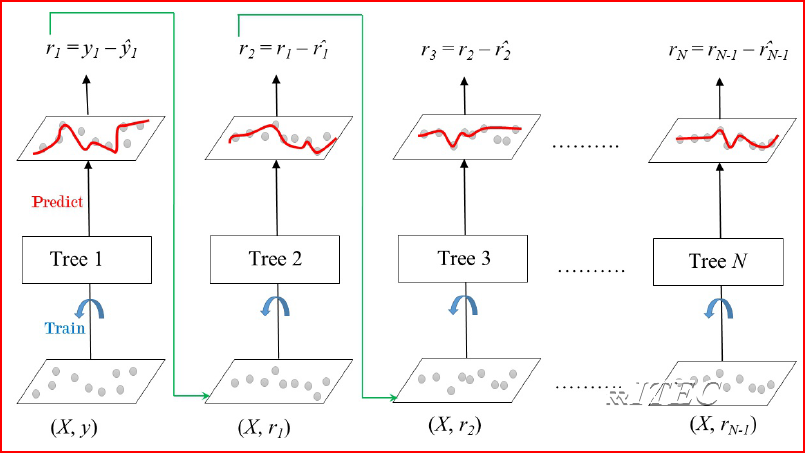

# Shrinkage
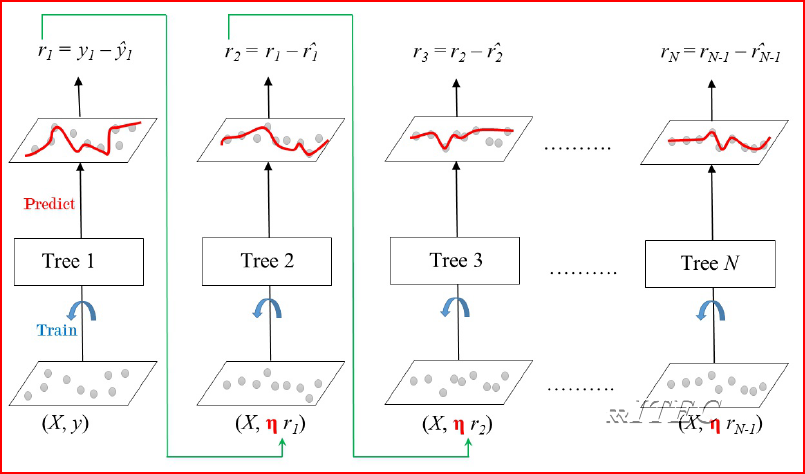

- Gradient Boosted Trees: Prediction
    - Regression:
        - y = y + ηr + ... + ηr
        - In sklearn: GradientBoostingRegressor.
    - Classification:
        - In sklearn: GradientBoostingClassifier.

## Step 1: Import required modules

In [14]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

## Step 2: Import Data

In [15]:
os.chdir("C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\02 Lab Data\\Python")
df = pd.read_csv("auto-mpg.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
size      392 non-null float64
dtypes: float64(4), int64(2)
memory usage: 18.5 KB


In [16]:
X = df.loc[:,df.columns !="mpg"]

In [17]:
y= df["mpg"]

## Step 3: Split Data

In [18]:
# Set SEED for reproducibility
SEED = 1
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300,max_depth=1,random_state=SEED)

## Step 4: Fit dt and gbt classifiers 

In [19]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.26,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [20]:
# Fit ada to the training set
gbt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

## Step 5 : predict 

In [21]:
y_pred_dt= dt.predict(X_test)

In [22]:
RMSE_test_dt = (MSE(y_test, y_pred_dt))**(1/2)
# Print acc
print('rmse of dt: {:.2f}'.format(RMSE_test_dt))

rmse of dt: 4.86


In [23]:
y_pred_gbt= gbt.predict(X_test)

In [24]:
RMSE_test_gbt = (MSE(y_test, y_pred_gbt))**(1/2)
# Print acc
print('rmse of gbt: {:.2f}'.format(RMSE_test_gbt))

rmse of gbt: 4.08


## Home Work 
* With this we are stoping Supervised Machine Learning
* If needed try to explore xgboost